<a href="https://www.kaggle.com/code/ahmedadelmohamed11/diabetes-prediction?scriptVersionId=205458169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
dataset.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [5]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical = X_train.select_dtypes(include='object')
numeric = X_train.select_dtypes(exclude='object')

In [6]:
ohe = OneHotEncoder(sparse_output=False)
categorical = ohe.fit_transform(categorical)

In [7]:
poly = PolynomialFeatures(degree=3, interaction_only=False)
numeric = poly.fit_transform(numeric)

In [8]:
stdscaler = StandardScaler()
numeric = stdscaler.fit_transform(numeric)

In [9]:
X_train = np.concatenate((numeric,categorical), axis=1)
X_train.shape

(80000, 93)

In [10]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def cost(y, y_hat, lambda_):
    result = -(1/m) * np.sum(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))
    result += (lambda_/(2 * m)) * np.sum(w**2)
    return result

def gradient_desc(X, y, y_hat, alpha, lambda_):

    w_grad = (alpha/m) * np.dot(X.T, (y_hat - y)) + (lambda_/m) * w
    b_grad = (alpha/m) * np.sum((y_hat - y))

    return w_grad, b_grad

def visualize_cost(err):
    plt.plot(np.arange(1,len(err)+1), err, color='red', linewidth=3)
    plt.title('Minimize Cost Function')
    plt.xlabel('number of itteration')
    plt.ylabel('Mean Square Error')
    plt.show()

def predict(y_hat):
    return np.where(y_hat >= 0.5, 1, 0)

In [11]:
alpha = 0.1
lambda_ = 1
w = np.zeros(X_train.shape[1])
b = 0
m = len(X_train)
err = []

for _ in range(250):
    z = np.dot(X_train, w) + b
    y_hat = sigmoid(z)
    w_grad, b_grad = gradient_desc(X_train, y_train, y_hat, alpha, lambda_)

    w = w - w_grad
    b = b - b_grad

    err.append(cost(y_train, y_hat, lambda_))

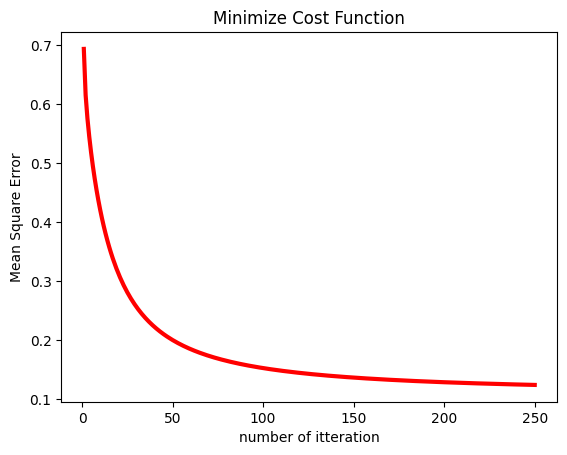

Accuracy: 96.06%


In [12]:
z = np.dot(X_train, w) + b
y_hat = sigmoid(z)

accuracy_train = accuracy_score(y_train, predict(y_hat))
accuracy_percentage = accuracy_train * 100

visualize_cost(err)
print(f"Accuracy: {accuracy_percentage:.2f}%")

In [13]:
numeric = X_test.select_dtypes(exclude='object')
categorical = X_test.select_dtypes(include='object')

categorical = ohe.transform(categorical)
numeric = poly.transform(numeric)
numeric = stdscaler.transform(numeric)

X_test = np.concatenate((numeric,categorical), axis=1)
X_test.shape

(20000, 93)

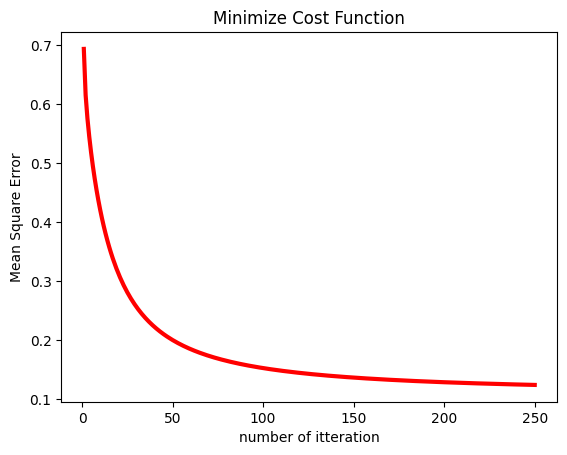

Accuracy: 95.86%


In [14]:
z = np.dot(X_test, w) + b
y_hat = sigmoid(z)

accuracy_test = accuracy_score(y_test, predict(y_hat))
accuracy_percentage = accuracy_test * 100

visualize_cost(err)
print(f"Accuracy: {accuracy_percentage:.2f}%")

In [15]:
np.unique(predict(y_hat), return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([18864,  1136])),
 (array([0, 1]), array([18292,  1708])))